In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle

 write code to store all the files in each folder starting with Normal, PreadtorBoth, PreyBoth, Swapped separately into daframes in different columns



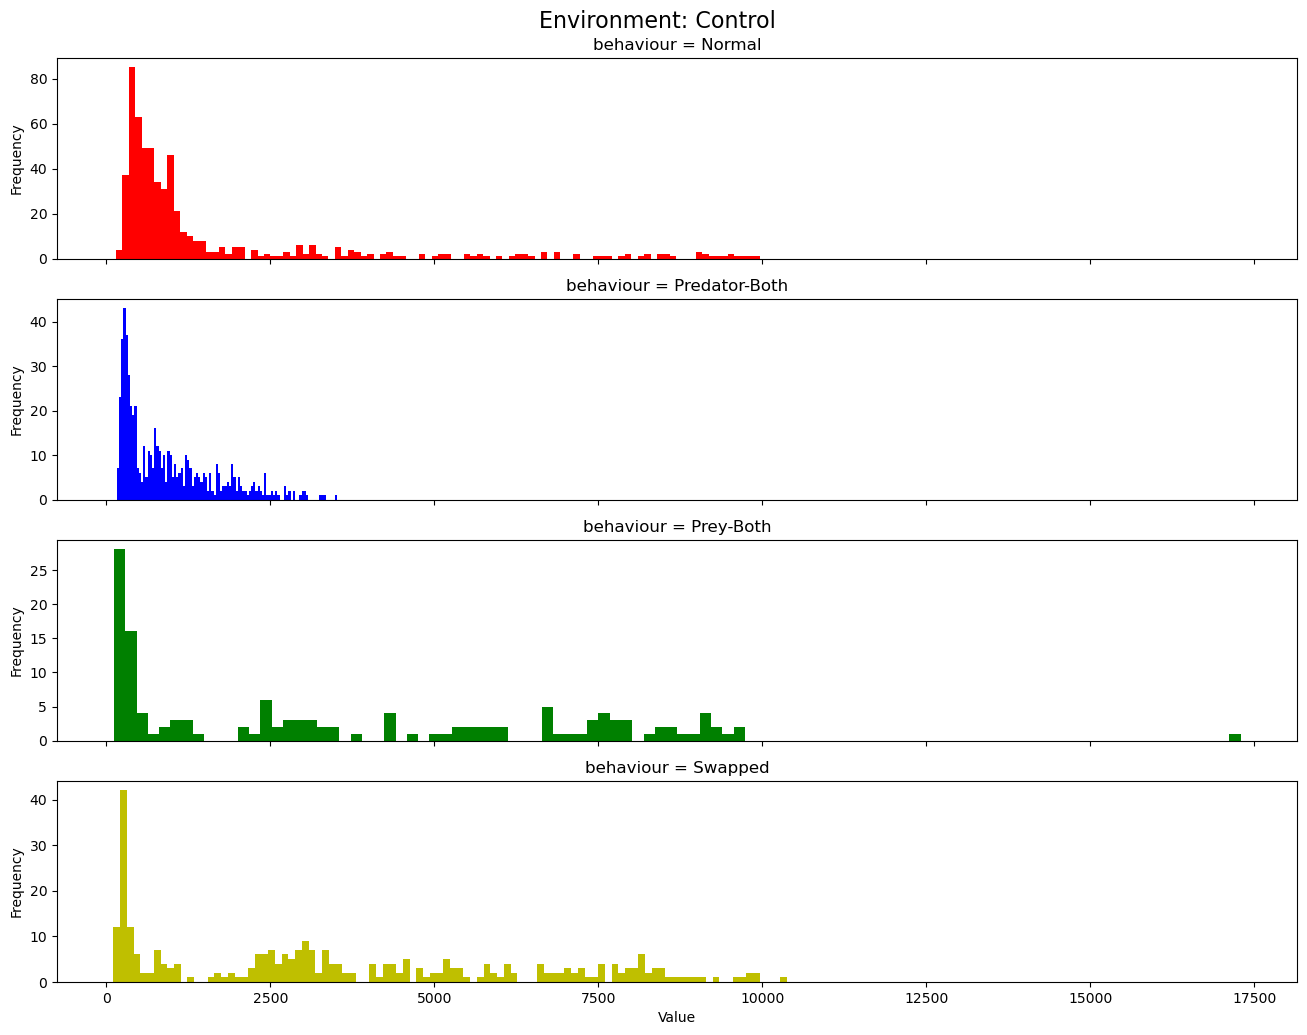

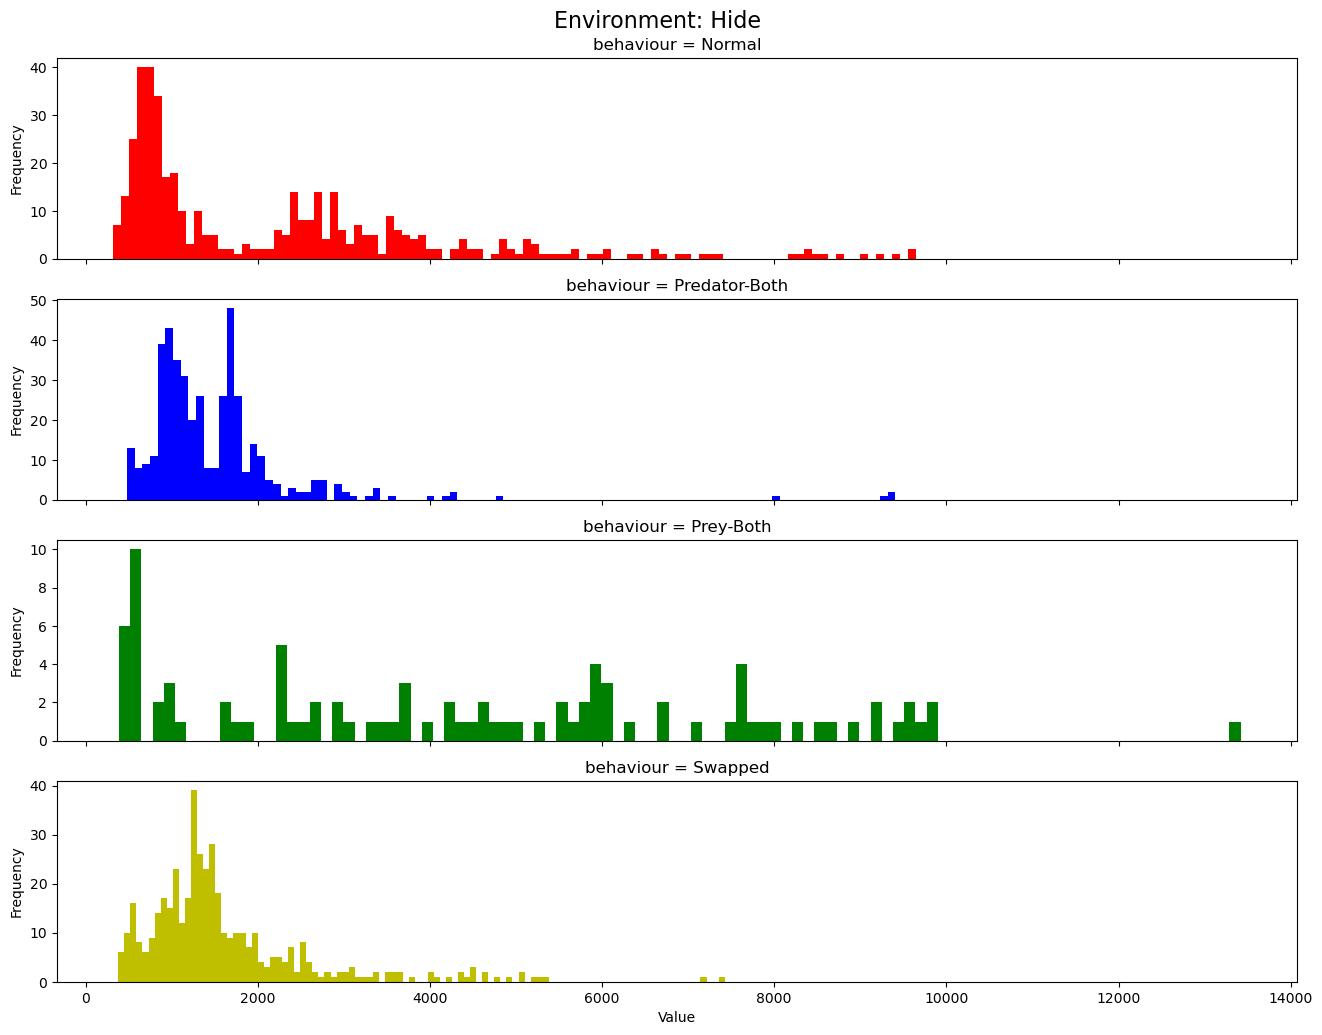

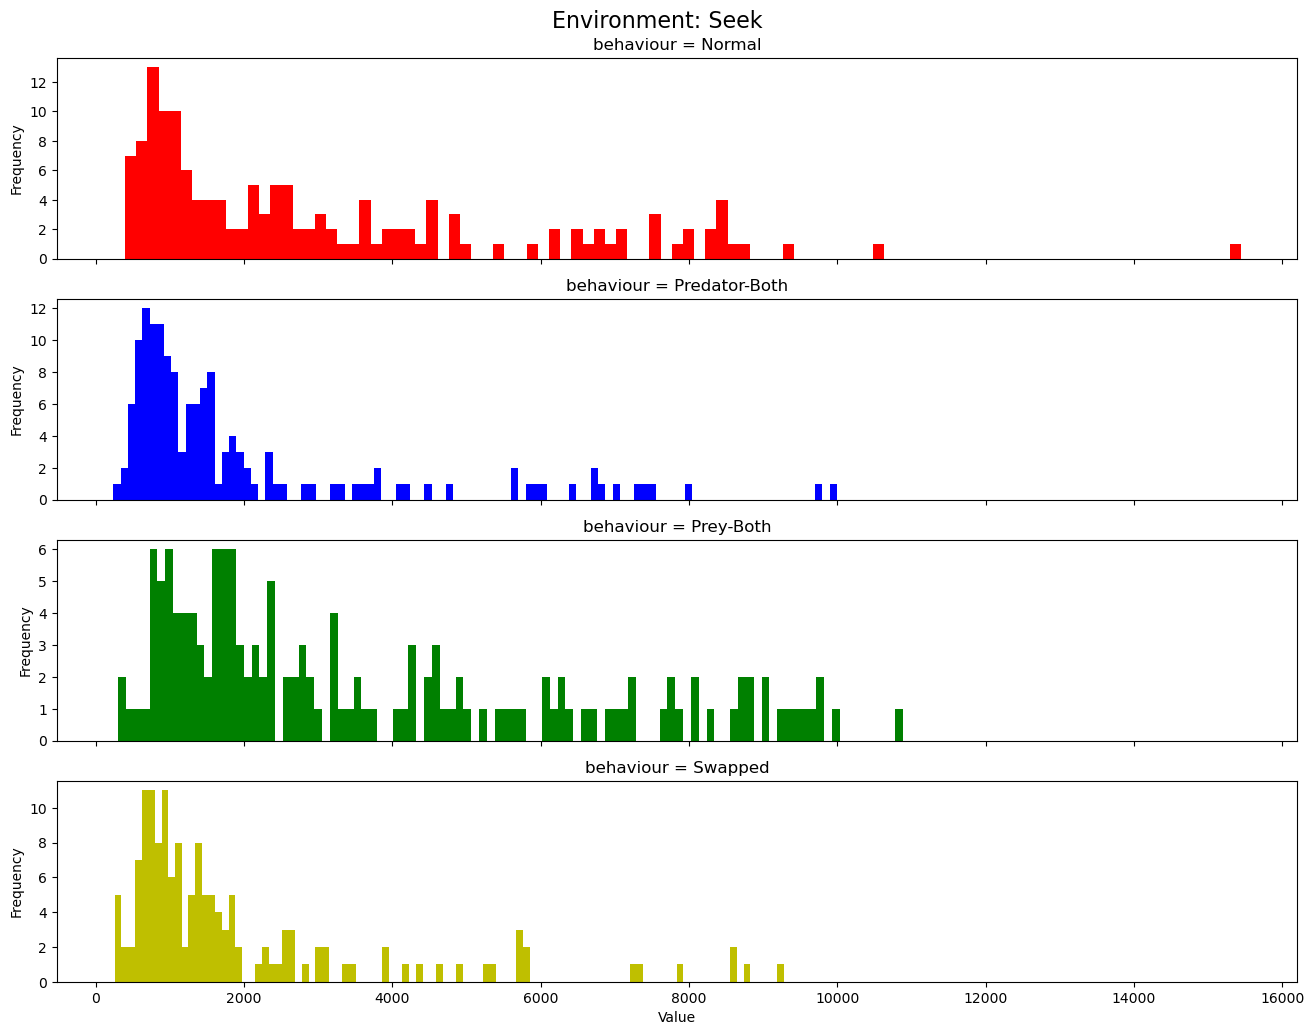

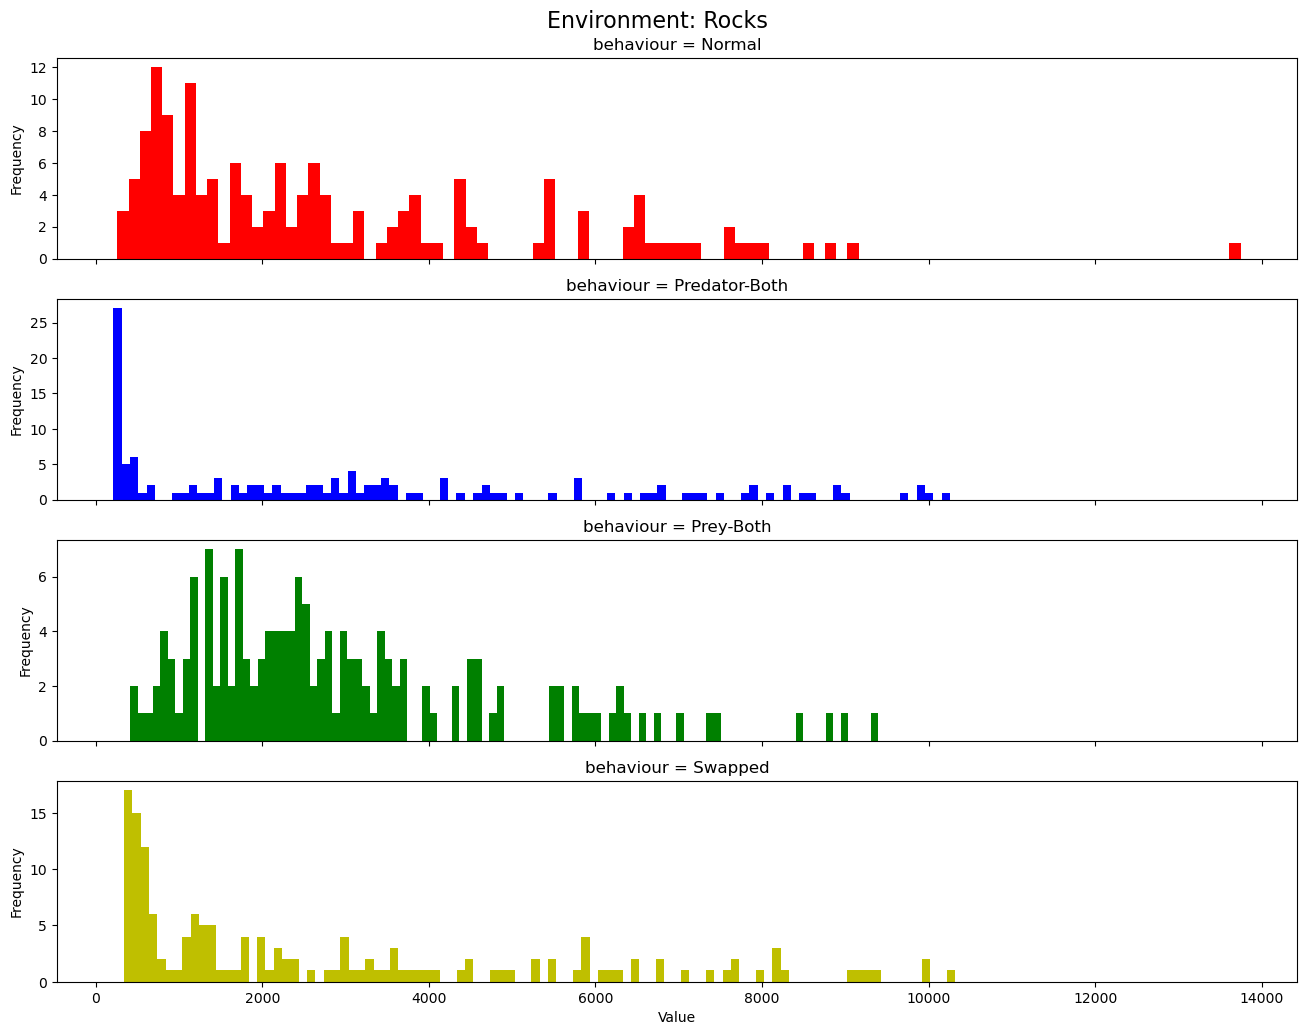

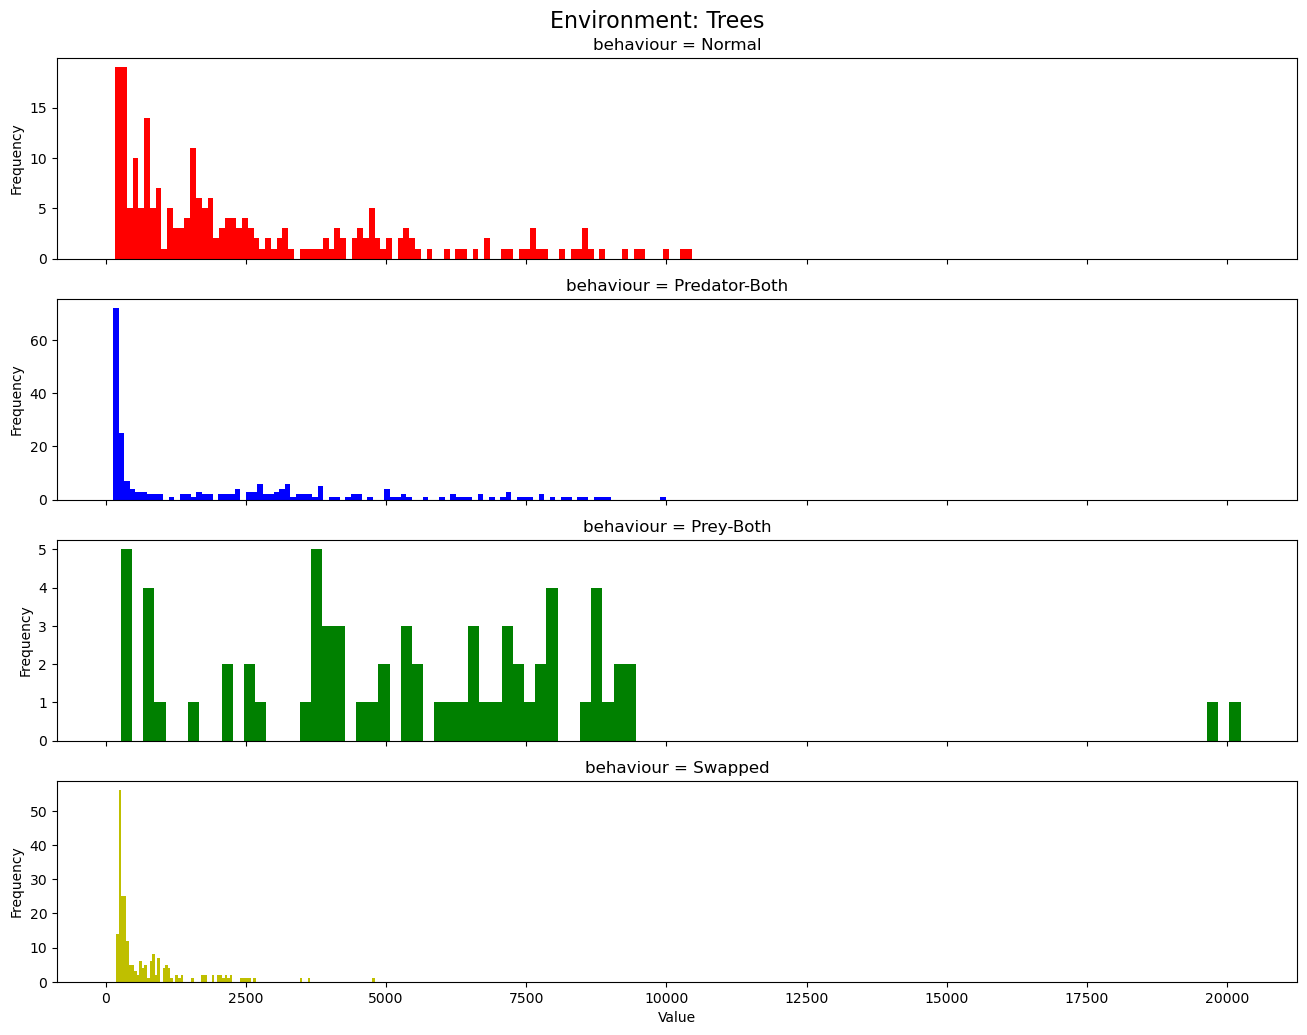

In [3]:

behaviour = ["Normal", "PredatorBoth", "PreyBoth", "SwappedBoth"]
bb = ["Normal", "Predator-Both", "Prey-Both", "Swapped"]
envs = ["Control", "Hide", "Seek", "Rocks", "Trees"]
ee = ["Control", "Hide", "Seek", "Rocks", "Trees"]

def get_data(path):
    files = os.listdir(path)
    files = [f for f in files if f.endswith(".txt")]
    data = []
    for f in files:
        df = pd.read_csv(os.path.join(path, f), header=None)
        data.append(df)
    dd = pd.concat(data, ignore_index=True)
    return dd

colours = "rbgy"

for i, env in enumerate(envs):
    df = pd.DataFrame()
    fig, axs = plt.subplots(4, 1, figsize=(16, 12), sharex=True, sharey=False)
    # Set the spacing between subplots
    #fig.subplots_adjust(hspace=4)
    for j, b in enumerate(behaviour):
        path = b + env
        df[b] = get_data(path)[0]
        ax = axs[j]

        # Set y-axis label for each column
        ax.set_ylabel(f'Frequency - {b}')
        # Set x-axis label
        ax.set_xlabel('Value')
        ax.title.set_text(f'behaviour = {bb[j]}')

        # Plot histogram on the subplot
        df[b].plot(ax = ax, kind='hist', bins = 100,color=colours[j])

    # Set overall title
    plt.suptitle('Environment: ' + ee[i], fontsize=16, y=0.92)

    # Display the plot
    plt.show()




In [9]:

data = []
full_df = []
for i, env in enumerate(envs):
    df = pd.DataFrame()
    print("Environment: ", env)
    medians = []
    behaviours = []
    counts = []

    for j, b in enumerate(behaviour):
        path = b + env
        medians.append(get_data(path).median()[0])
        counts.append(get_data(path).count()[0])
    
    df["Time Survived"] = medians
    df["Configuration"] = bb
    df["Environment"] = env
    df["counts"] = counts

    full_df.append(df)

full_df = pd.concat(full_df)

print(full_df)
    # plot the means of the columns using  abar chart
    # df.median().plot(kind='bar')
    # plt.show()


# draw a bar chart using plotly express
import plotly.express as px
# add color to the bar chart
fig = px.bar(full_df, barmode='group', x = "Environment", y = "Time Survived", custom_data=full_df['counts'], labels={'index':'Environment', 'value':'Median'}, color='Configuration', title="Median time survived by prey with different configurations in the inference environments")
fig.update_traces(hovertemplate='%{counts}')
fig.show()

Environment:  Control
Environment:  Hide
Environment:  Seek
Environment:  Rocks
Environment:  Trees
   Time Survived  Configuration Environment  counts
0          759.0         Normal     Control     589
1          859.5  Predator-Both     Control    1916
2         2652.0      Prey-Both     Control     138
3         3023.5        Swapped     Control     302
0         1322.0         Normal        Hide     431
1         1280.5  Predator-Both        Hide     578
2         4211.5      Prey-Both        Hide      92
3         1341.0        Swapped        Hide    1025
0         2167.5         Normal        Seek     148
1         1423.0  Predator-Both        Seek     594
2         2679.0      Prey-Both        Seek     156
3         1398.0        Swapped        Seek     682
0         2094.0         Normal       Rocks     153
1         2593.5  Predator-Both       Rocks     128
2         2502.5      Prey-Both       Rocks     160
3         2131.5        Swapped       Rocks     330
0         1678.5